In [1]:
from lightkurve import KeplerTargetPixelFile, KeplerLightCurveFile, lightcurve
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
target = 'KOI-217'
qRange = [1,17]

In [3]:
%%capture
lc = []
tpfs = []
for q in range(qRange[0],qRange[1]):
    try:
        lc.append(KeplerLightCurveFile.from_archive(target, quarter=q))
        tpfs.append(KeplerTargetPixelFile.from_archive(target, quarter=q))
    except:
        continue
    

In [4]:
%%capture
pipeline_lc = tpfs[0].to_lightcurve().flatten()
for tpf in tpfs:
    pipeline_lc = pipeline_lc.append(tpf.to_lightcurve().flatten())
    
pipeline_lc = pipeline_lc.remove_nans()
pipeline_lc = pipeline_lc.remove_outliers()

Text(0.5,1,'Pipeline Light Curve Kepler-109')

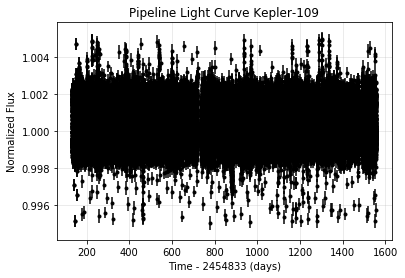

In [5]:
pipeline_lc.plot(marker='.',linestyle='none')
plt.title('Pipeline Light Curve Kepler-109')

In [6]:
log_list, trial_periods, period = lightcurve.iterative_box_period_search(lc = pipeline_lc, 
                                                  niters= 2, 
                                                  min_period= 3, 
                                                  max_period= 4, 
                                                  nperiods= 10000, 
                                                  period_scale= 'linear')
print(period)

  0%|          | 0/10000 [00:00<?, ?it/s]/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
 91%|█████████ | 9056/10000 [11:21<01:11, 13.29it/s]/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
100%|██████████| 10000/10000 [12:42<00:00, 13.11it/s]

3.904890489048905


In [7]:
folded_lc = (pipeline_lc.fold(period=3.90489, phase=0.0).normalize())
final_lc = (folded_lc.bin())

Text(0.5,1,'Binned Data')

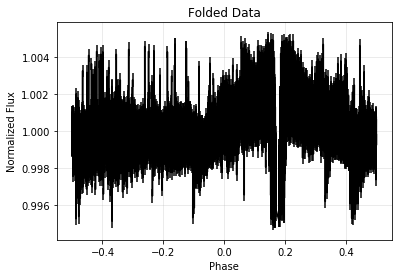

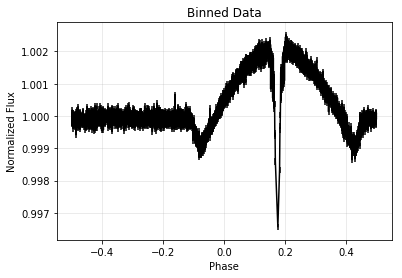

In [8]:
folded_lc.plot()
plt.title('Folded Data')
final_lc.plot()
plt.title('Binned Data')

In [11]:
depth = (1.0023-(0.9965))/(1.0023)
print(depth, '(percentage)') 

0.005786690611593252 (percentage)


In [10]:
Rp = (depth**(.5))*1.32
print(Rp,'in solar radii')

0.10211919103213253 in solar radii
